In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_histogram(image):
    """Compute histogram values for grayscale and color images."""
    if len(image.shape) == 2:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        return hist
    else:
        channels = cv2.split(image)
        colors = ('b', 'g', 'r')
        hist_data = {}
        for (chan, color) in zip(channels, colors):
            hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
            hist_data[color] = hist
        return hist_data

In [3]:
def plot_histogram(image, title="Histogram"):
    """Plot histogram for grayscale and color images."""
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count")
    
    if len(image.shape) == 2:
        hist = compute_histogram(image)
        plt.plot(hist, color='k')
    else:
        hist_data = compute_histogram(image)
        for color, hist in hist_data.items():
            plt.plot(hist, color=color)
    
    plt.xlim([0, 256])
    plt.show()


In [4]:
def histogram_equalization(image):
    """Enhance image contrast using histogram equalization."""
    if len(image.shape) == 2:
        return cv2.equalizeHist(image)
    else:
        channels = cv2.split(image)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        return cv2.merge(eq_channels)

In [5]:
def apply_fft(image):
    """Compute the Discrete Fourier Transform and return its magnitude spectrum."""
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

In [6]:
def apply_ifft(dft_shift):
    """Apply the Inverse Fourier Transform to reconstruct the image."""
    dft_ishift = np.fft.ifftshift(dft_shift)
    img_reconstructed = np.fft.ifft2(dft_ishift)
    return np.abs(img_reconstructed)

In [7]:
def verify_rotation_property(image, angle=45):
    """Verify rotation property of Fourier Transform."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    rot_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rot_matrix, (w, h))
    
    _, _, magnitude_original = apply_fft(image)
    _, _, magnitude_rotated = apply_fft(rotated_image)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Magnitude Spectrum")
    plt.imshow(magnitude_original, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f"Rotated {angle}° Magnitude Spectrum")
    plt.imshow(magnitude_rotated, cmap='gray')
    plt.show()


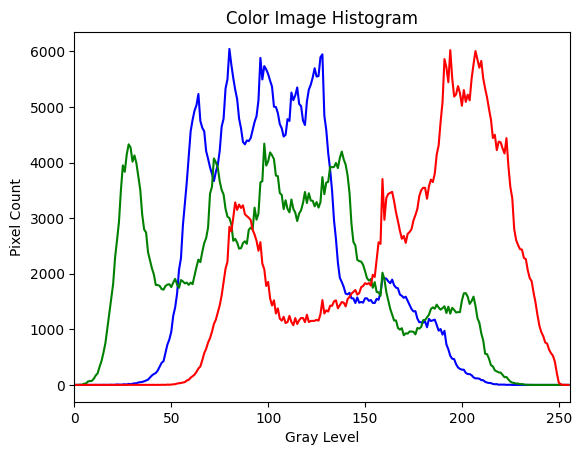

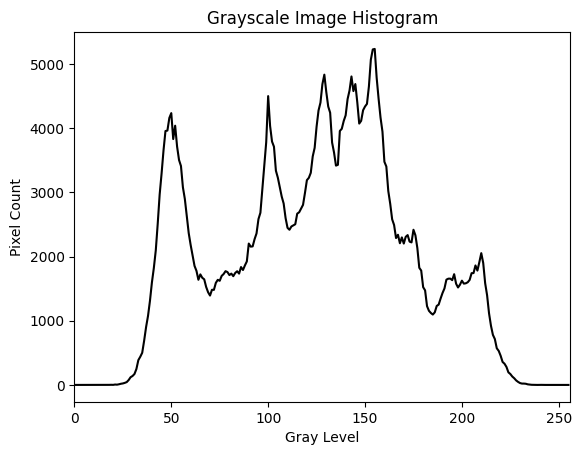

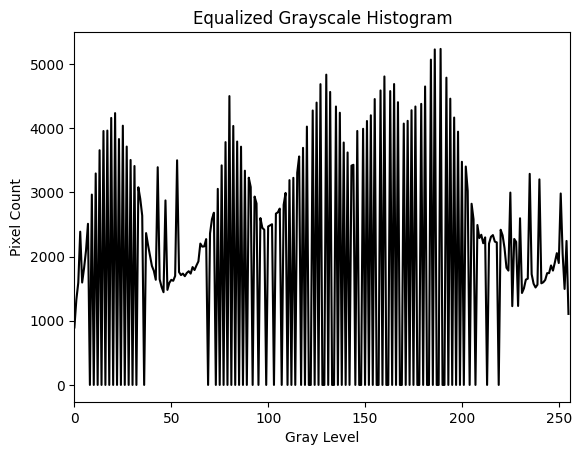

In [8]:
# Example usage
image_path = "rgb.png"  # Provide an image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plot_histogram(image, "Color Image Histogram")
plot_histogram(gray_image, "Grayscale Image Histogram")

equalized_image = histogram_equalization(gray_image)
plot_histogram(equalized_image, "Equalized Grayscale Histogram")

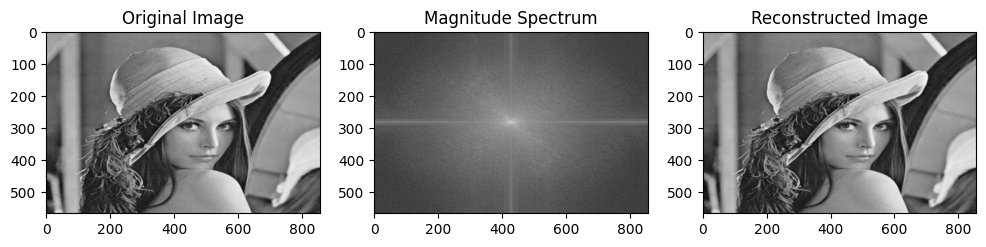

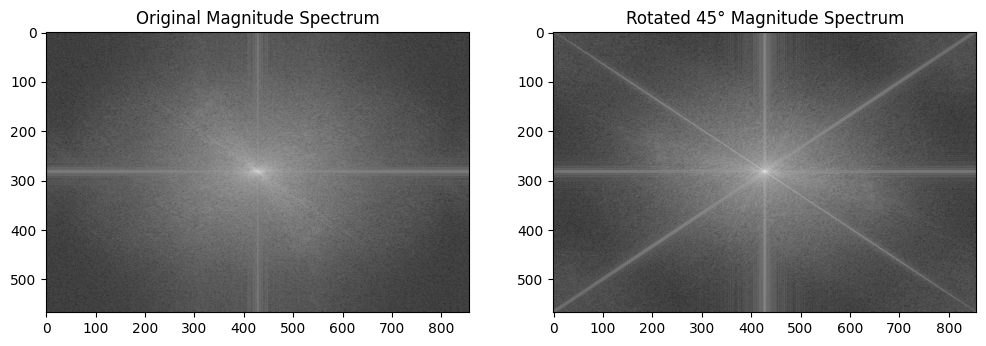

In [9]:
# Fourier Transform and Inverse
_, dft_shift, magnitude_spectrum = apply_fft(gray_image)
reconstructed_image = apply_ifft(dft_shift)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.show()

# Rotation Verification
verify_rotation_property(gray_image, 45)
